#### main

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import mysql.connector
import sys
import calendar

from datetime import date, datetime, timedelta
from dateutil.parser import parse
from scipy import stats

In [ ]:
# bokeh modules imported below

#### singapore monthly temperature / yearly temperature

In [14]:
df_temp = pd.read_csv('surface-air-temperature-monthly-mean.csv')

In [15]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 468 entries, 0 to 467
Data columns (total 2 columns):
month        468 non-null object
mean_temp    468 non-null float64
dtypes: float64(1), object(1)
memory usage: 7.4+ KB


In [16]:
df_temp.head()

,month,mean_temp
0,1982-01,25.9
1,1982-02,27.1
2,1982-03,27.2
3,1982-04,27.0
4,1982-05,28.0


In [17]:
# convert month from string to datetime
df_temp['month'] = pd.to_datetime(df_temp['month'], format='%Y-%m')

In [19]:
df_temp.head()

,month,mean_temp
0,1982-01-01,25.9
1,1982-02-01,27.1
2,1982-03-01,27.2
3,1982-04-01,27.0
4,1982-05-01,28.0


In [22]:
# groupby in year
# get the mean temperature for each year
df_temp_year = df_temp.groupby(df_temp.month.dt.year)['mean_temp'].agg('mean')

In [23]:
df_temp_year.head()

month
1982    27.358333
1983    27.666667
1984    26.766667
1985    27.116667
1986    27.100000
Name: mean_temp, dtype: float64

In [44]:
df_temp_year = pd.DataFrame(df_temp_year)

In [46]:
# sort the temperature from lowest to highest
df_temp_year.sort_values('mean_temp', ascending=True, inplace=True)
df_temp_year.head()

,mean_temp
month,
1984,26.766667
1989,26.916667
1986,27.100000
1985,27.116667
1988,27.233333


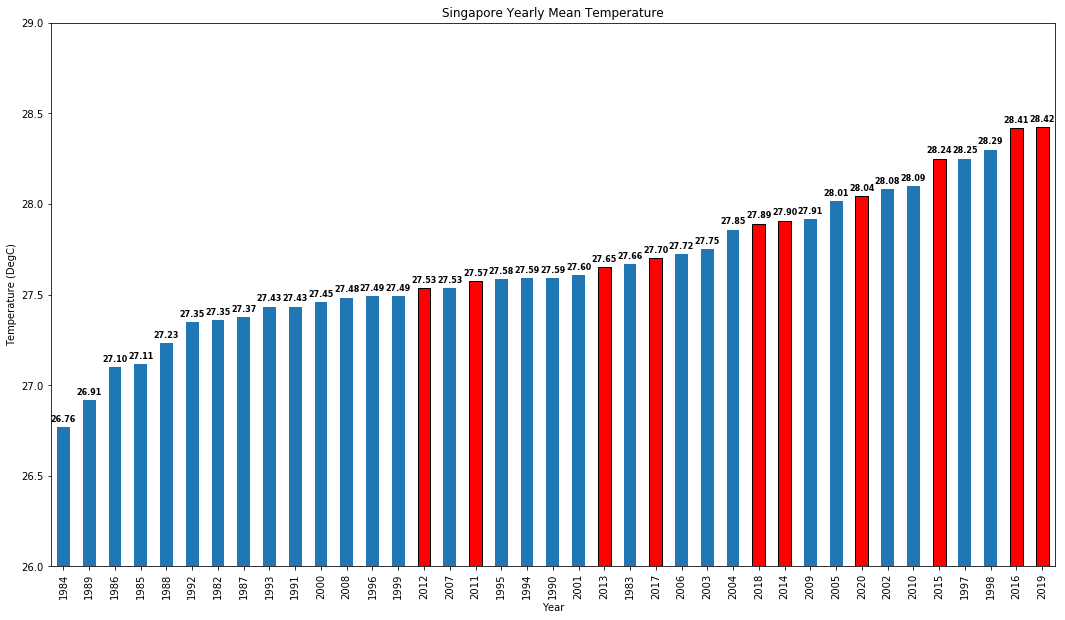

In [204]:
# plot in bar chart from lowest to highest
ax1 = df_temp_year.plot(kind='bar', figsize=(18,10), legend=None)
# ax1.legend()
ax1.set_xlabel('Year')
ax1.set_ylabel('Temperature (DegC)')
ax1.set_ylim((26,29));
ax1.set_title('Singapore Yearly Mean Temperature');
        
# adding value labels
rects = ax1.patches
labels = df_temp_year.mean_temp
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax1.text(rect.get_x() + rect.get_width() / 2, height + 0.02, str(label)[:5], 
             ha='center', va='bottom', color='black', fontweight='bold', fontsize=8)

# need to convert df_temp_year index from int64 to string
df_temp_year.index = df_temp_year.index.map(str)
# converting recent decade years to red (from 2011 to 2020)
# need to convert year format from int to string
for ticks in ax1.xaxis.get_major_ticks():
    if ticks.label1.get_text() in list(map(str, list(range(2011,2021)))):
        ax1.patches[df_temp_year.index.get_indexer([ticks.label1.get_text()])[0]].set_facecolor('r')
        ax1.patches[df_temp_year.index.get_indexer([ticks.label1.get_text()])[0]].set_edgecolor('k')

#### heatmap (monthly temperature from 2011 to 2020)

In [223]:
df_temp = pd.read_csv('surface-air-temperature-monthly-mean.csv')

In [224]:
df_temp['date'] = pd.to_datetime(df_temp['month'], format='%Y-%m')

In [228]:
df_temp['year'] = df_temp.date.dt.year
df_temp['month'] = df_temp['date'].apply(lambda x: x.strftime("%B"))
df_temp_2010s = df_temp[df_temp.date > pd.to_datetime('2010-12-31', format="%Y-%m-%d")]
df_temp_2010s.reset_index(inplace=True, drop=True)
df_temp_2010s.head()

,month,mean_temp,date,year
0,January,26.3,2011-01-01,2011
1,February,27.3,2011-02-01,2011
2,March,27.1,2011-03-01,2011
3,April,27.9,2011-04-01,2011
4,May,28.5,2011-05-01,2011


In [231]:
months = ["December", "November", "October", "September", "August", "July", 
          "June", "May", "April", "March", "February", "January"]
df_temp_2010s['month'] = pd.Categorical(df_temp_2010s['month'], categories=months, ordered=True)

# pivot dataframe
summary = df_temp_2010s.pivot('month', 'year', 'mean_temp')

C:\Users\DPA041\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


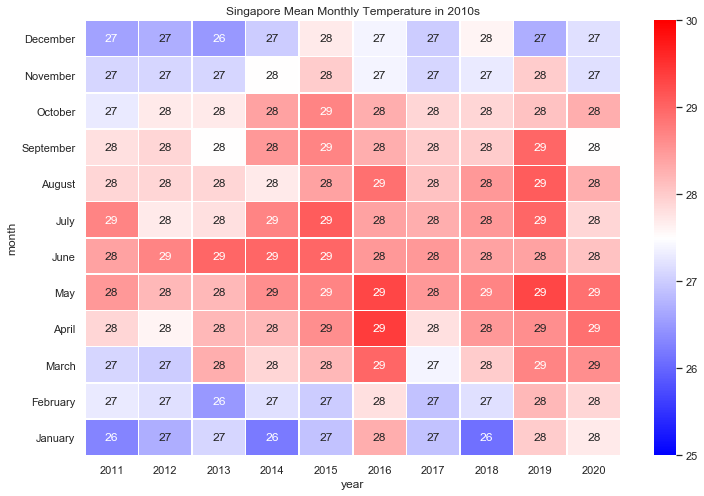

In [436]:
# using seaborn
f, ax = plt.subplots(figsize=(12,8))
sns.heatmap(summary, annot=True, linewidths=0.5, ax=ax, cmap='bwr', vmin=25, vmax=30)
plt.title('Singapore Mean Monthly Temperature in 2010s')
plt.show()

#### heatmap (monthly temperature from 1991 to 2000)

In [18]:
df_temp = pd.read_csv('surface-air-temperature-monthly-mean.csv')

In [19]:
df_temp['date'] = pd.to_datetime(df_temp['month'], format='%Y-%m')

In [23]:
df_temp['year'] = df_temp.date.dt.year
df_temp['month'] = df_temp['date'].apply(lambda x: x.strftime("%B"))
df_temp_1980s = df_temp[df_temp.date < pd.to_datetime('1990-12-31', format="%Y-%m-%d")]
df_temp_1980s.reset_index(inplace=True, drop=True)
df_temp_1980s.head()

,month,mean_temp,date,year
0,January,25.9,1982-01-01,1982
1,February,27.1,1982-02-01,1982
2,March,27.2,1982-03-01,1982
3,April,27.0,1982-04-01,1982
4,May,28.0,1982-05-01,1982


In [24]:
months = ["December", "November", "October", "September", "August", "July", 
          "June", "May", "April", "March", "February", "January"]
df_temp_1980s['month'] = pd.Categorical(df_temp_1980s['month'], categories=months, ordered=True)

# pivot dataframe
summary = df_temp_1980s.pivot('month', 'year', 'mean_temp')

C:\Users\DPA041\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


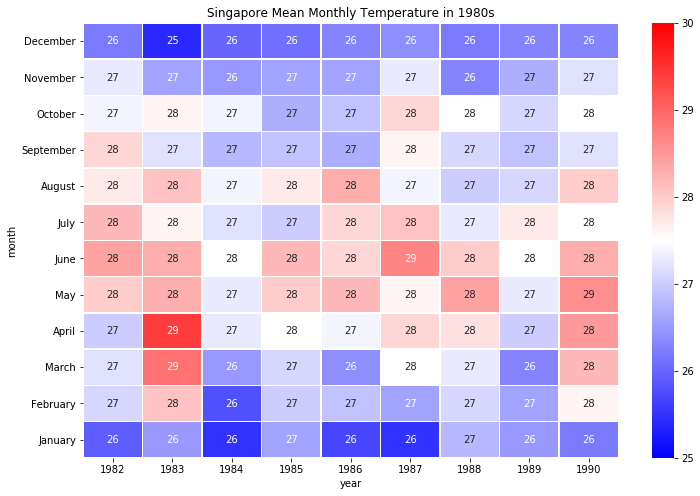

In [26]:
# using seaborn
f, ax = plt.subplots(figsize=(12,8))
sns.heatmap(summary, annot=True, linewidths=0.5, ax=ax, cmap='bwr', vmin=25, vmax=30)
plt.title('Singapore Mean Monthly Temperature in 1980s')
plt.show()

#### night temperature

In [ ]:
# look at the line graph

In [239]:
df_wb_temp = pd.read_csv('wet-bulb-temperature-hourly.csv')

In [234]:
df_wb_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341880 entries, 0 to 341879
Data columns (total 3 columns):
wbt_date                341880 non-null object
wbt_time                341880 non-null int64
wet_bulb_temperature    341880 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 7.8+ MB


In [235]:
# see where the data starts from
df_wb_temp.head()

,wbt_date,wbt_time,wet_bulb_temperature
0,1982-01-01,1,24.7
1,1982-01-01,2,24.5
2,1982-01-01,3,24.3
3,1982-01-01,4,24.2
4,1982-01-01,5,24.2


In [242]:
# see where the data ends at
df_wb_temp.tail()

,wbt_date,wbt_time,wet_bulb_temperature
341875,2020-12-31,20,24.8
341876,2020-12-31,21,24.9
341877,2020-12-31,22,24.9
341878,2020-12-31,23,24.6
341879,2020-12-31,24,24.7


In [290]:
# take night temperature only
# night temperature only starts at 7pm and ends at 6am
df_wb_temp_night = df_wb_temp[(df_wb_temp['wbt_time']>18) | (df_wb_temp['wbt_time']<7)]
df_wb_temp_night['wbt_date'] = pd.to_datetime(df_wb_temp_night['wbt_date'], format='%Y-%m-%d')
df_wb_temp_night_day = df_wb_temp_night.groupby([(df_wb_temp_night.wbt_date.dt.year),
                                                 (df_wb_temp_night.wbt_date.dt.month)]).mean()
df_wb_temp_night_day.index.levels[0].rename('wbt_year', inplace=True)
df_wb_temp_night_day.index.levels[1].rename('wbt_month', inplace=True)
df_wb_temp_night_day.reset_index(inplace=True)
df_wb_temp_night_day.head()

C:\Users\DPA041\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,wbt_year,wbt_month,wbt_time,wet_bulb_temperature
0,1982,1,12.5,23.094086
1,1982,2,12.5,23.932440
2,1982,3,12.5,24.493011
3,1982,4,12.5,24.718611
4,1982,5,12.5,25.478226


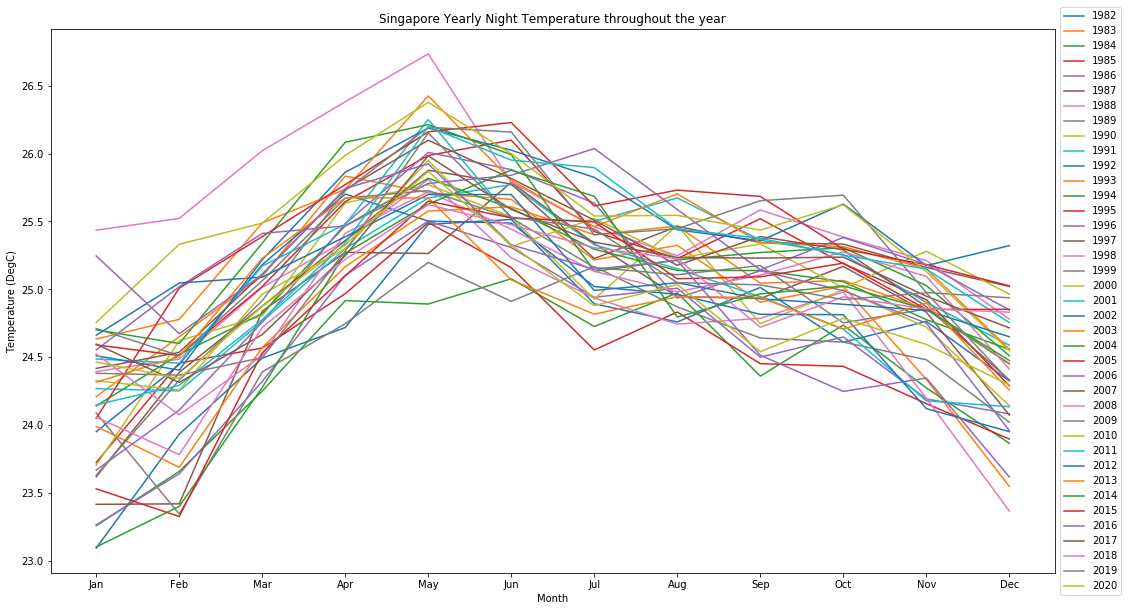

In [306]:
plt.figure(figsize=(18,10))
for x in df_wb_temp_night_day.wbt_year.unique():
    q1 = df_wb_temp_night_day[df_wb_temp_night_day['wbt_year']==x]['wbt_month']
    r1 = df_wb_temp_night_day[df_wb_temp_night_day['wbt_year']==x]['wet_bulb_temperature']
    plt.plot(q1, r1, label=x)

# change month name from number to actual month name
labels = [datetime.datetime(2017,_,1).strftime('%b') for _ in range(1,13)]

plt.ylabel('Temperature (DegC)')
plt.xlabel('Month')
plt.xticks(q1, labels)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Singapore Yearly Night Temperature throughout the year');

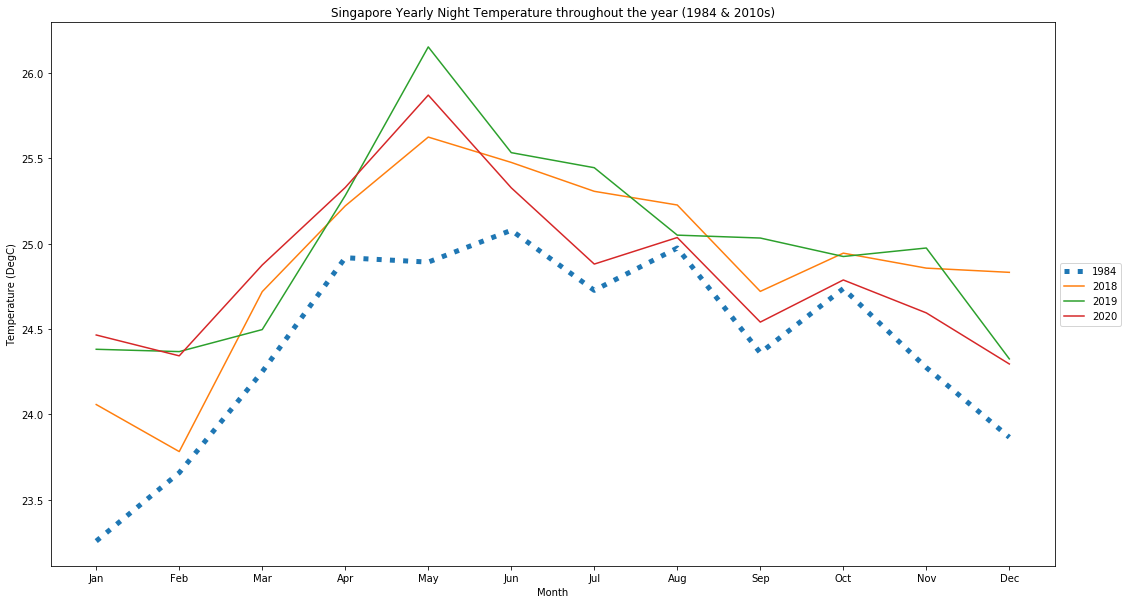

In [312]:
# 1984 as benchmark (since lowest mean temp in the year shown earlier)
# use last 3 recent years so not so clumped
df_wb_temp_night_day = df_wb_temp_night_day[(df_wb_temp_night_day.wbt_year == 1984) |
                                            (df_wb_temp_night_day.wbt_year > 2017)]

plt.figure(figsize=(18,10))
for x in df_wb_temp_night_day.wbt_year.unique():
    q1 = df_wb_temp_night_day[df_wb_temp_night_day['wbt_year']==x]['wbt_month']
    r1 = df_wb_temp_night_day[df_wb_temp_night_day['wbt_year']==x]['wet_bulb_temperature']
    if x == 1984:
        plt.plot(q1, r1, label=x, linestyle='dotted', linewidth=5)
    else:
        plt.plot(q1, r1, label=x)
        
# change month name from number to actual month name
labels = [datetime.datetime(2021,_,1).strftime('%b') for _ in range(1,13)]

plt.ylabel('Temperature (DegC)')
plt.xlabel('Month')
plt.xticks(q1, labels)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Singapore Yearly Night Temperature throughout the year (1984 & 2010s)');

#### monthly rainfall

In [317]:
df_rain = pd.read_csv('rainfall-monthly-total.csv')

In [318]:
df_rain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 468 entries, 0 to 467
Data columns (total 2 columns):
month             468 non-null object
total_rainfall    468 non-null float64
dtypes: float64(1), object(1)
memory usage: 7.4+ KB


In [319]:
df_rain.head()

,month,total_rainfall
0,1982-01,107.1
1,1982-02,27.8
2,1982-03,160.8
3,1982-04,157.0
4,1982-05,102.2


In [320]:
df_rain.tail()

,month,total_rainfall
463,2020-08,103.4
464,2020-09,150.2
465,2020-10,78.8
466,2020-11,220.6
467,2020-12,253.2


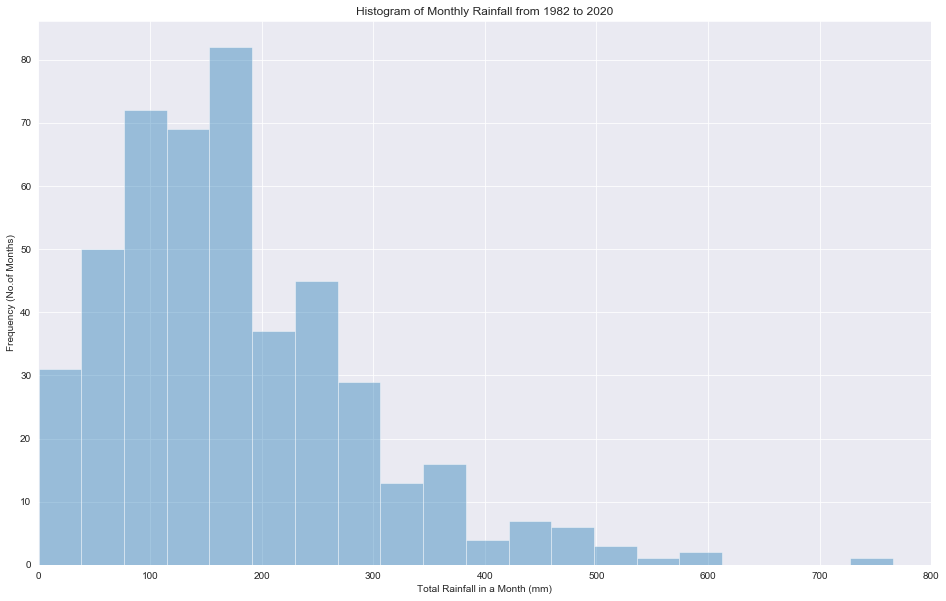

In [363]:
# histogram of the occurrence of monthly rainfall
plt.figure(figsize=(16,10))
sns.set_style("dark")
sns.distplot(df_rain['total_rainfall'], kde=False);
plt.xlim((0,800))
plt.xlabel('Total Rainfall in a Month (mm)')
plt.ylabel('Frequency (No.of Months)')
plt.title('Histogram of Monthly Rainfall from 1982 to 2020')
plt.grid()

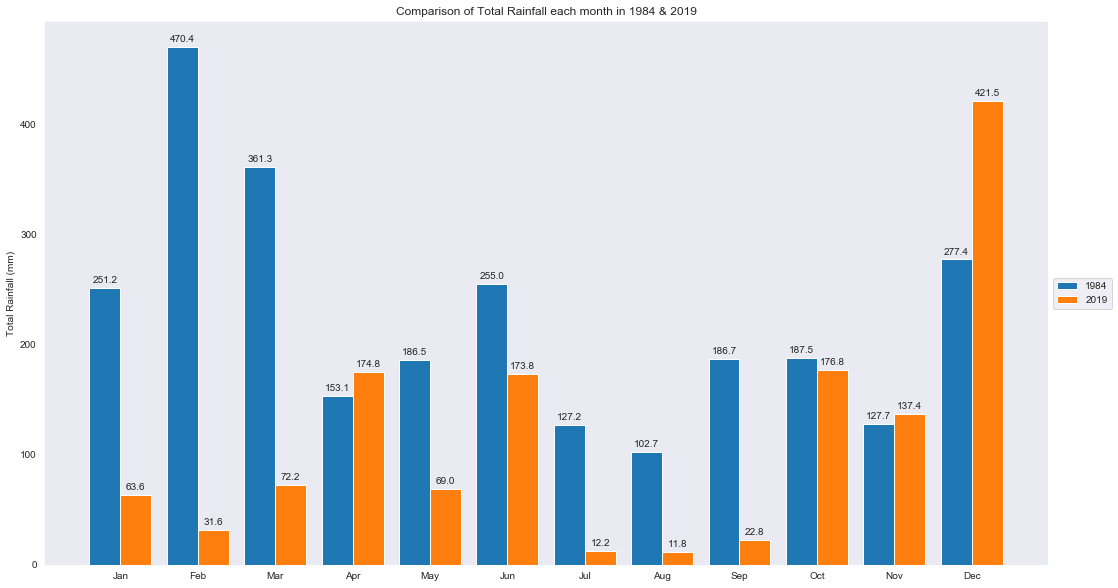

In [374]:
# looking at 1984 and 2019 rainfall
# the coldest year and the hottest year in our data

df_rain = pd.read_csv('rainfall-monthly-total.csv')
df_rain['month'] = pd.to_datetime(df_rain['month'], format='%Y-%m')
df_rain['year'] = df_rain.month.dt.year

# get actual month name
labels = [datetime.datetime(2017,_,1).strftime('%b') for _ in range(1,13)]
c1 = df_rain[df_rain.year == 1984]['total_rainfall']
h1 = df_rain[df_rain.year == 2019]['total_rainfall']

x = np.arange(len(labels))
width = 0.4

fig, ax = plt.subplots(figsize=(18,10))
rects1 = ax.bar(x - width/2, c1, width, label='1984')
rects2 = ax.bar(x + width/2, h1, width, label='2019')

ax.set_ylabel('Total Rainfall (mm)')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_title('Comparison of Total Rainfall each month in 1984 & 2019')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

def labelling(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy = (rect.get_x() + rect.get_width()/2, height),
                    xytext = (0,3),
                    textcoords = 'offset points',
                    ha = 'center', va = 'bottom')
        
labelling(rects1)
labelling(rects2)

#### relationship between mean temperature and total rainfall

In [392]:
df_rain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 468 entries, 0 to 467
Data columns (total 3 columns):
month             468 non-null datetime64[ns]
total_rainfall    468 non-null float64
year              468 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 11.0 KB


In [393]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 468 entries, 0 to 467
Data columns (total 4 columns):
month        468 non-null object
mean_temp    468 non-null float64
date         468 non-null datetime64[ns]
year         468 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 14.7+ KB


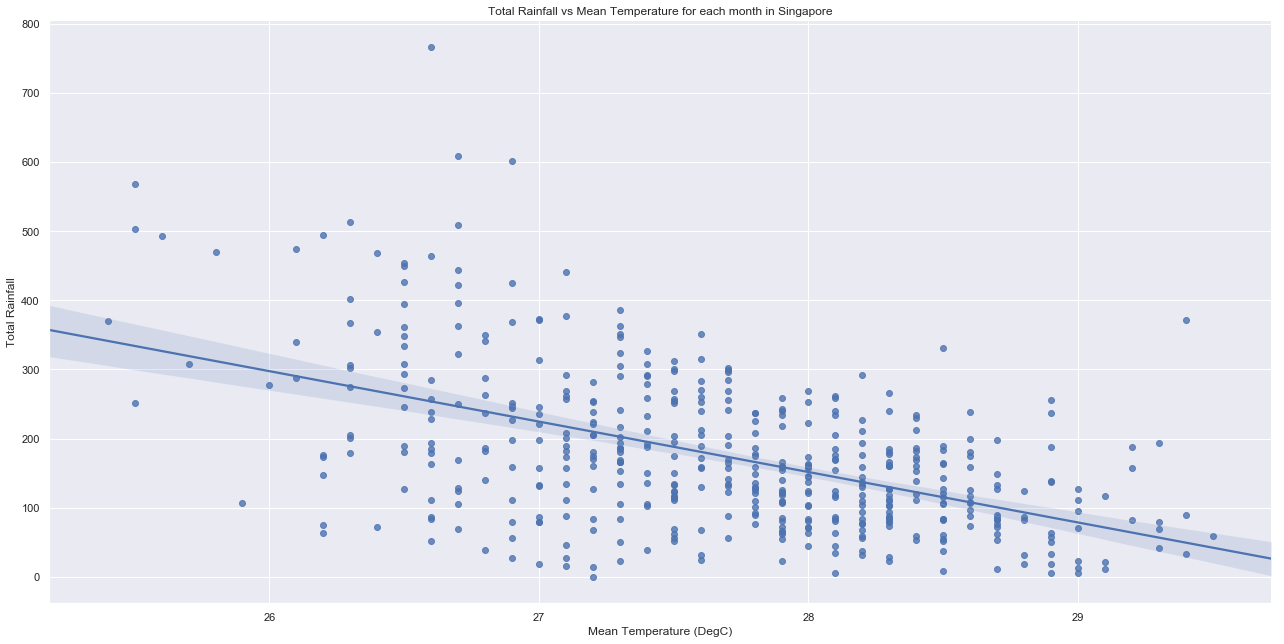

Monthly Rainfall vs Mean Temperature correlation coefficient: -0.52


In [435]:
df = pd.concat([df_temp, df_rain], axis=1)
df.set_index('date', inplace=True)
# eliminate duplicating columns
df = df.iloc[:, [0,1,4,5]]

# plt.figure(figsize=(18,18));
sns.set_style('darkgrid')
# instead of figsize, use height, aspect to change figure size
sns.lmplot(x='mean_temp', y='total_rainfall', data=df, fit_reg=True, height=9, aspect=2)
plt.ylabel('Total Rainfall')
plt.xlabel('Mean Temperature (DegC)')
plt.title('Total Rainfall vs Mean Temperature for each month in Singapore');
plt.show()

r = stats.pearsonr(df.mean_temp, df.total_rainfall)
print('Monthly Rainfall vs Mean Temperature correlation coefficient: {}'.format(round(r[0],2)))

#### pandas with mySQL

In [ ]:
# recreate importing modules because kernel keep crashing while running mysql

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import mysql.connector
import sys
import calendar

from datetime import date, datetime, timedelta
from dateutil.parser import parse
from scipy import stats
from mysql.connector import errorcode

In [3]:
df = pd.read_csv('surface-air-temperature-monthly-mean.csv')
user, pw, host, db = 'root', '3zqeshgo', '127.0.0.1', 'mydatabase'
cnx = mysql.connector.connect(user=user, password=pw, host=host, database=db)
cursor = cnx.cursor()

In [ ]:
# created table in mysql workbench
# CREATE TABLE mydatabase;
# USE mydatabase;
# CREATE TABLE datatemp (    
#   yearmonth varchar(255) NOT NULL PRIMARY KEY,           
#   mean_temp float(10,7)
# );

In [4]:
try:
    for index, col in df.iterrows():
        yearmonth = col[0]
        mean_temp = col[1]
        
        query = ("INSERT INTO datatemp (yearmonth, mean_temp)"
                 "VALUES (%(yearmonth)s, %(mean_temp)s)")
               
        data = {
            'yearmonth': yearmonth,
            'mean_temp': mean_temp
        }
        
        cursor.execute(query, data)
        print("Adding row " + str(index))
        cnx.commit()
    
    print('All data inserted!')

except:
    print("Unexpected error:", sys.exc_info()[0])
    exit()

finally:
    cursor.close()
    cnx.close()

Adding row 0
Adding row 1
Adding row 2
Adding row 3
Adding row 4
Adding row 5
Adding row 6
Adding row 7
Adding row 8
Adding row 9
Adding row 10
Adding row 11
Adding row 12
Adding row 13
Adding row 14
Adding row 15
Adding row 16
Adding row 17
Adding row 18
Adding row 19
Adding row 20
Adding row 21
Adding row 22
Adding row 23
Adding row 24
Adding row 25
Adding row 26
Adding row 27
Adding row 28
Adding row 29
Adding row 30
Adding row 31
Adding row 32
Adding row 33
Adding row 34
Adding row 35
Adding row 36
Adding row 37
Adding row 38
Adding row 39
Adding row 40
Adding row 41
Adding row 42
Adding row 43
Adding row 44
Adding row 45
Adding row 46
Adding row 47
Adding row 48
Adding row 49
Adding row 50
Adding row 51
Adding row 52
Adding row 53
Adding row 54
Adding row 55
Adding row 56
Adding row 57
Adding row 58
Adding row 59
Adding row 60
Adding row 61
Adding row 62
Adding row 63
Adding row 64
Adding row 65
Adding row 66
Adding row 67
Adding row 68
Adding row 69
Adding row 70
Adding row 71
Ad

In [ ]:
# to make another query, need to re
user, pw, host, db = 'root', '3zqeshgo', '127.0.0.1', 'mydatabase'
cnx = mysql.connector.connect(user=user, password=pw, host=host, database=db)
cursor = cnx.cursor()

In [4]:
select_stmt = ("SELECT * FROM datatemp WHERE LEFT(yearmonth, 4) = '1984'")

try:
    cursor.execute(select_stmt)
    test1 = pd.DataFrame(cursor.fetchall(),
                      columns = ['yearmonth','mean_temp'])
    print(test1.head())
    print("Query finished!")
except:
    print("Unexpected error:", sys.exc_info()[0])
    exit()
finally:
    cursor.close()
    cnx.close()

  yearmonth  mean_temp
0   1984-01       25.5
1   1984-02       25.8
2   1984-03       26.5
3   1984-04       27.3
4   1984-05       27.3
Query finished!


In [5]:
# to make another query, need to reconnect
user, pw, host, db = 'root', '3zqeshgo', '127.0.0.1', 'mydatabase'
cnx = mysql.connector.connect(user=user, password=pw, host=host, database=db)
cursor = cnx.cursor()

In [6]:
select_stmt = ("SELECT * FROM datatemp WHERE LEFT(yearmonth, 4) = '2019'")

try:
    cursor.execute(select_stmt)
    test2 = pd.DataFrame(cursor.fetchall(),
                      columns = ['yearmonth','mean_temp'])
    print(test2.head())
    print("Query finished!")
except:
    print("Unexpected error:", sys.exc_info()[0])
    exit()
finally:
    cursor.close()
    cnx.close()

  yearmonth  mean_temp
0   2019-01       28.0
1   2019-02       28.2
2   2019-03       28.7
3   2019-04       28.6
4   2019-05       29.3
Query finished!


#### bokeh

In [ ]:
# bokeh dropdown

In [7]:
from bokeh.io import curdoc
from bokeh.layouts import column
from bokeh.models import CustomJS, ColumnDataSource, Select
from bokeh.plotting import figure, show, output_file

In [17]:
daterange = pd.date_range(start='2018-01', freq='M', periods=12).month_name().tolist()

gap1b = test1.mean_temp.tolist()
gap2b = test2.mean_temp.tolist()

plot = figure(title='Singapore Mean Monthly Temperature throughout the year (1984 & 2019)',
              width=800, height=300, x_range=daterange,
              x_axis_label='Month', y_axis_label='Temperature (DegC)')
p1984 = plot.line(daterange, gap1b, color='blue', alpha=0.5, line_dash='dashed')
p2019 = plot.line(daterange, gap2b, color='red', alpha=0.5)

callback = CustomJS(args=dict(p1984=p1984, p2019=p2019), code="""
    f = cb_obj.value;
    p1984.visible = false;
    p2019.visible = false;
    if      (f == '1984') {p1984.visible = true;}
    else if (f == '2019') {p2019.visible = true;}
    else {
        p1984.visible = true;
        p2019.visible = true;
    }
""")

menu = Select(options=['1984', '2019', '1984 & 2019'],
              value='1984 & 2019',
              title='Year',
              callback=callback)

layout = column(menu, plot)
curdoc().add_root(layout)

output_file('tempdata.html')
show(layout);

#### sandbox

In [33]:
df_temp_year

month
1984    26.766667
1989    26.916667
1986    27.100000
1985    27.116667
1988    27.233333
1992    27.350000
1982    27.358333
1987    27.375000
1993    27.433333
1991    27.433333
2000    27.458333
2008    27.483333
1996    27.491667
1999    27.491667
2012    27.533333
2007    27.533333
2011    27.575000
1995    27.583333
1994    27.591667
1990    27.591667
2001    27.608333
2013    27.650000
1983    27.666667
2017    27.700000
2006    27.725000
2003    27.750000
2004    27.858333
2018    27.891667
2014    27.908333
2009    27.916667
2005    28.016667
2020    28.041667
2002    28.083333
2010    28.100000
2015    28.250000
1997    28.250000
1998    28.300000
2016    28.416667
2019    28.425000
Name: mean_temp, dtype: float64